**Financial Analysis Project**

**Data Description**: The file bank.csv contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

**Context**: This case is about a bank (DB Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.**bold text**



In [76]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
df= pd.read_csv('/content/Bank_Loan_Modelling.csv')
df.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
df.shape


(5000, 14)

In [6]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [7]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [8]:
df.drop(['ID', 'ZIP Code'], axis = 1, inplace = True)

In [9]:
df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [10]:
import plotly.express as ps

In [11]:
fig = ps.box(df, y = ['Age', 'Experience', 'Income', 'Family', 'Education'])
fig.show()

In [12]:
df.dtypes

Age                     int64
Experience              int64
Income                  int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [13]:
df.skew()

Age                  -0.029341
Experience           -0.026325
Income                0.841339
Family                0.155221
CCAvg                 1.598443
Education             0.227093
Mortgage              2.104002
Personal Loan         2.743607
Securities Account    2.588268
CD Account            3.691714
Online               -0.394785
CreditCard            0.904589
dtype: float64

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Experience'}>,
        <Axes: title={'center': 'Income'}>],
       [<Axes: title={'center': 'Family'}>,
        <Axes: title={'center': 'CCAvg'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'Mortgage'}>,
        <Axes: title={'center': 'Personal Loan'}>,
        <Axes: title={'center': 'Securities Account'}>],
       [<Axes: title={'center': 'CD Account'}>,
        <Axes: title={'center': 'Online'}>,
        <Axes: title={'center': 'CreditCard'}>]], dtype=object)

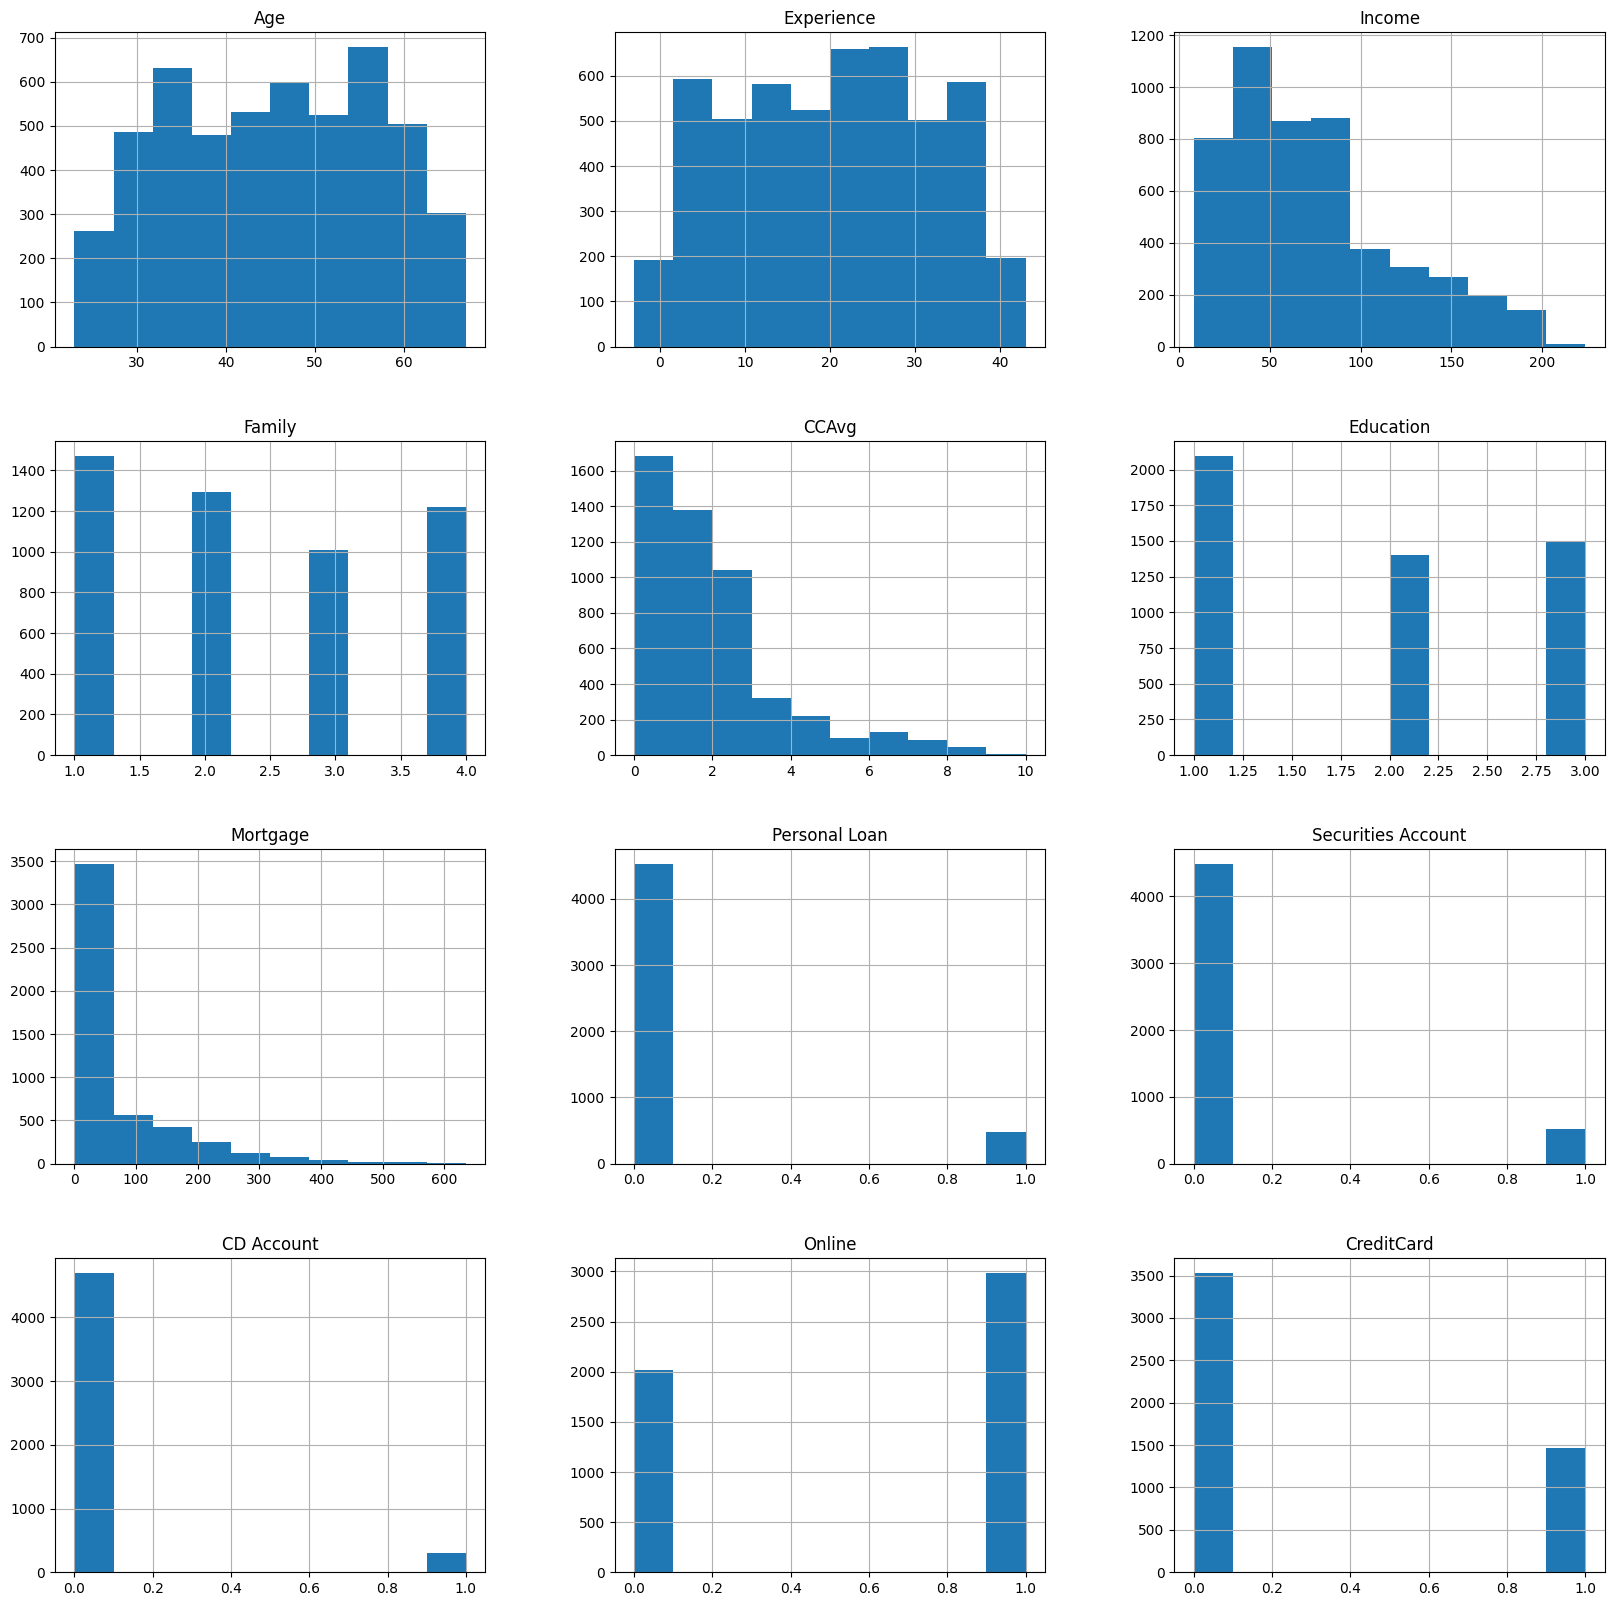

In [14]:
df.hist(figsize = (20,20))

In [15]:
import seaborn as sns


<ipython-input-16-c295d2895934>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Experience', ylabel='Density'>

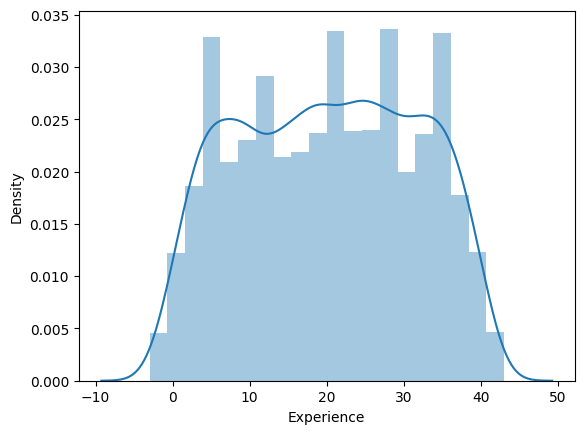

In [16]:
sns.distplot(df['Experience'])


In [17]:
df['Experience'].mean()

20.1046

negative_exp = df[df['Experience']<0]
negative_exp.head()

In [19]:
negative_exp.shape

(52, 12)

<ipython-input-20-38b8acee6dc3>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Age', ylabel='Density'>

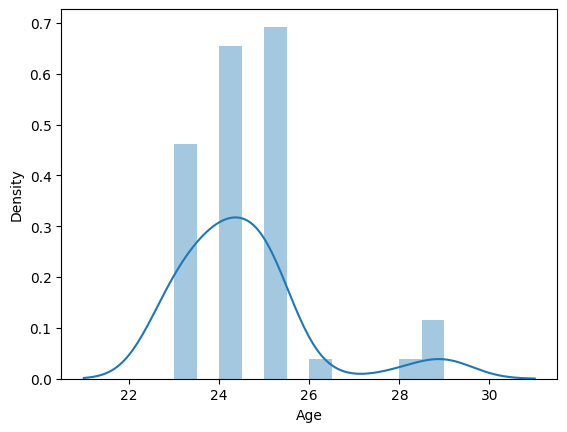

In [20]:
sns.distplot(negative_exp['Age'])

In [21]:
negative_exp['Experience'].mean()

-1.4423076923076923

In [22]:
negative_exp.size

624

In [23]:
print('There are {} records which has negative values for experience, approx {} %'.format(negative_exp.size ,
                                ((negative_exp.size/df.size)*100)))

There are 624 records which has negative values for experience, approx 1.04 %


In [24]:
data = df.copy()

In [25]:
data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [26]:
data.shape

(5000, 12)

In [27]:
df.shape

(5000, 12)

In [28]:
import numpy as np

In [29]:
data['Experience'] = np.where(data['Experience'] < 0,
                             data['Experience'].mean(),
                             data['Experience'])

In [30]:
data[data['Experience']<0]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


In [31]:
data.corr()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.977008,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.977008,1.000000,-0.049054,-0.045488,-0.048708,0.018097,-0.013378,-0.014045,-0.000462,0.005502,0.013455,0.008833
Income,-0.055269,-0.049054,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.045488,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.048708,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.018097,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.013378,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.014045,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.000462,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.005502,0.169738,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


<Axes: >

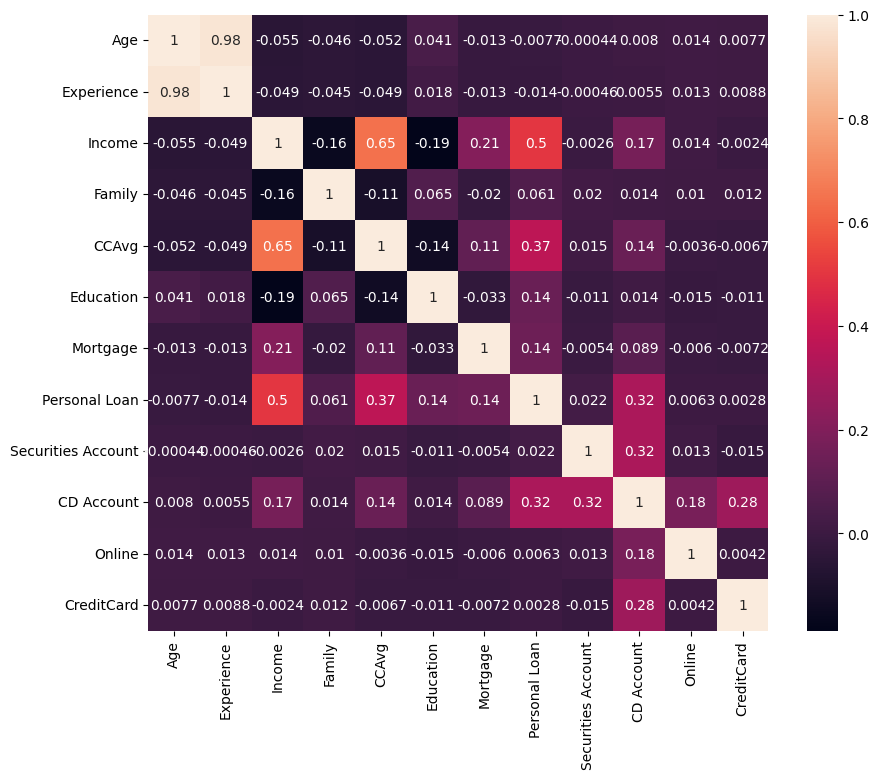

In [32]:
plt.figure(figsize = (10,8))
sns.heatmap(data.corr(), annot = True)

In [33]:
data = data.drop(['Experience'], axis = 1)

In [34]:
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


In [35]:
# Education
data['Education'].unique()

array([1, 2, 3])

In [36]:
def experience(x):
    if x == 1:
        return "Undergrade"
    if x == 2:
        return "Graduate"
    if x == 3:
        return "Prefessional Person"

In [37]:
data['EDU'] = data['Education'].apply(experience)

In [38]:
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,EDU
0,25,49,4,1.6,1,0,0,1,0,0,0,Undergrade
1,45,34,3,1.5,1,0,0,1,0,0,0,Undergrade
2,39,11,1,1.0,1,0,0,0,0,0,0,Undergrade
3,35,100,1,2.7,2,0,0,0,0,0,0,Graduate
4,35,45,4,1.0,2,0,0,0,0,0,1,Graduate


In [39]:
data['EDU'].unique()

array(['Undergrade', 'Graduate', 'Prefessional Person'], dtype=object)

In [40]:
education_dis = data.groupby('EDU')['Age'].count()

In [41]:
education_dis

EDU
Graduate               1403
Prefessional Person    1501
Undergrade             2096
Name: Age, dtype: int64

In [42]:
import plotly.express as ps

In [43]:
fig = ps.pie(data, values =education_dis, names =education_dis.index, title = 'Pie Chart')
fig.show()

In [44]:
data.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'EDU'],
      dtype='object')

In [45]:
data['Income'].unique()

array([ 49,  34,  11, 100,  45,  29,  72,  22,  81, 180, 105, 114,  40,
       112, 130, 193,  21,  25,  63,  62,  43, 152,  83, 158,  48, 119,
        35,  41,  18,  50, 121,  71, 141,  80,  84,  60, 132, 104,  52,
       194,   8, 131, 190,  44, 139,  93, 188,  39, 125,  32,  20, 115,
        69,  85, 135,  12, 133,  19,  82, 109,  42,  78,  51, 113, 118,
        64, 161,  94,  15,  74,  30,  38,   9,  92,  61,  73,  70, 149,
        98, 128,  31,  58,  54, 124, 163,  24,  79, 134,  23,  13, 138,
       171, 168,  65,  10, 148, 159, 169, 144, 165,  59,  68,  91, 172,
        55, 155,  53,  89,  28,  75, 170, 120,  99, 111,  33, 129, 122,
       150, 195, 110, 101, 191, 140, 153, 173, 174,  90, 179, 145, 200,
       183, 182,  88, 160, 205, 164,  14, 175, 103, 108, 185, 204, 154,
       102, 192, 202, 162, 142,  95, 184, 181, 143, 123, 178, 198, 201,
       203, 189, 151, 199, 224, 218])

In [46]:
data['Securities Account'].value_counts()

Securities Account
0    4478
1     522
Name: count, dtype: int64

In [47]:
data['CD Account'].value_counts()

CD Account
0    4698
1     302
Name: count, dtype: int64

In [48]:
def security(y):
    if(y['Securities Account'] == 1) & (y['CD Account'] == 1):
        return "Holds Securities & Depostie"
    if(y['Securities Account'] == 0) & (y['CD Account'] == 0):
        return "Does not hold Securites & Depsotie account"
    if(y['Securities Account'] == 1) & (y['CD Account'] == 0):
        return "Holds only Scurites account"
    if(y['Securities Account'] == 0) & (y['CD Account'] == 1):
        return "Holds only Deposite account"

In [49]:
data['Account_holder_category'] = data.apply(security, axis = 1)

In [50]:
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,EDU,Account_holder_category
0,25,49,4,1.6,1,0,0,1,0,0,0,Undergrade,Holds only Scurites account
1,45,34,3,1.5,1,0,0,1,0,0,0,Undergrade,Holds only Scurites account
2,39,11,1,1.0,1,0,0,0,0,0,0,Undergrade,Does not hold Securites & Depsotie account
3,35,100,1,2.7,2,0,0,0,0,0,0,Graduate,Does not hold Securites & Depsotie account
4,35,45,4,1.0,2,0,0,0,0,0,1,Graduate,Does not hold Securites & Depsotie account


In [51]:
values  = data['Account_holder_category'].value_counts()
values.index

Index(['Does not hold Securites & Depsotie account',
       'Holds only Scurites account', 'Holds only Deposite account',
       'Holds Securities & Depostie'],
      dtype='object', name='Account_holder_category')

In [55]:
data.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'EDU', 'Account_holder_category'],
      dtype='object')

In [56]:
ps.box(data, x = 'Education', y = 'Income', facet_col = 'Personal Loan')

In [57]:
data.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'EDU', 'Account_holder_category'],
      dtype='object')

<ipython-input-58-f08258d225c7>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-58-f08258d225c7>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




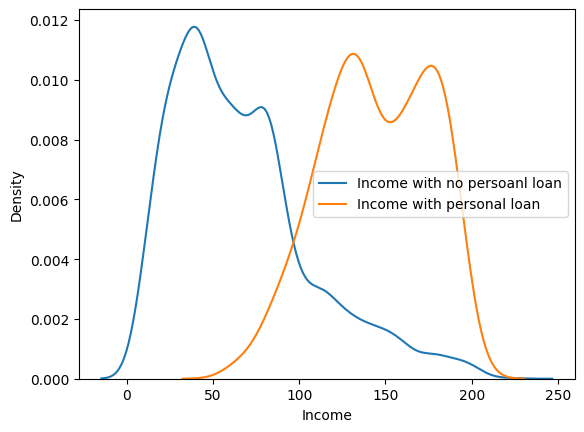

In [58]:
sns.distplot(data[data['Personal Loan'] == 0]['Income'], hist = False,
            label = "Income with no persoanl loan")

sns.distplot(data[data['Personal Loan'] == 1]['Income'], hist = False,
            label = "Income with personal loan")
plt.legend()

In [59]:
def plot(col1, col2, lable1, lable2, title):
    sns.distplot(data[data[col2] == 0][col1], hist = False,
            label =lable1)

    sns.distplot(data[data[col2] == 1][col1], hist = False,
            label = lable2)

    plt.legend()
    plt.title(title)

<ipython-input-59-da425e54aae5>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-59-da425e54aae5>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




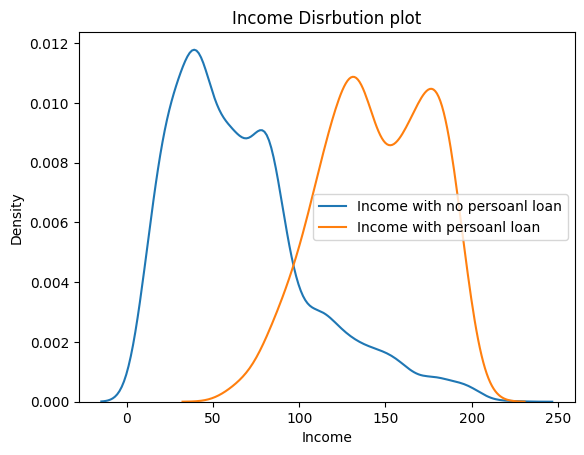

In [60]:
plot('Income', 'Personal Loan', "Income with no persoanl loan", "Income with persoanl loan", "Income Disrbution plot")

<ipython-input-59-da425e54aae5>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-59-da425e54aae5>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




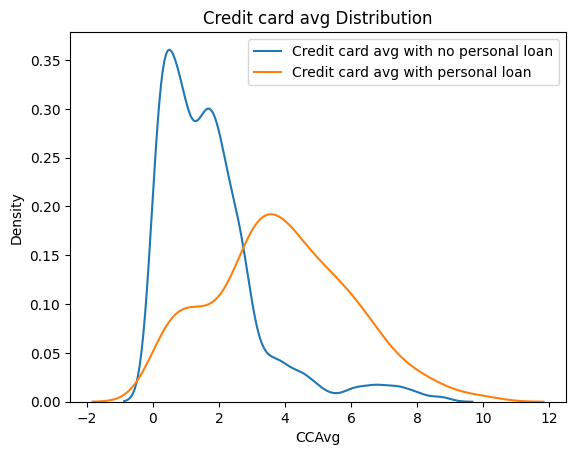

In [61]:
plot('CCAvg','Personal Loan',
     'Credit card avg with no personal loan',
     'Credit card avg with personal loan',
     'Credit card avg Distribution')

In [62]:
col = ['Securities Account',
      'Online',
      'Account_holder_category',
      'CreditCard']

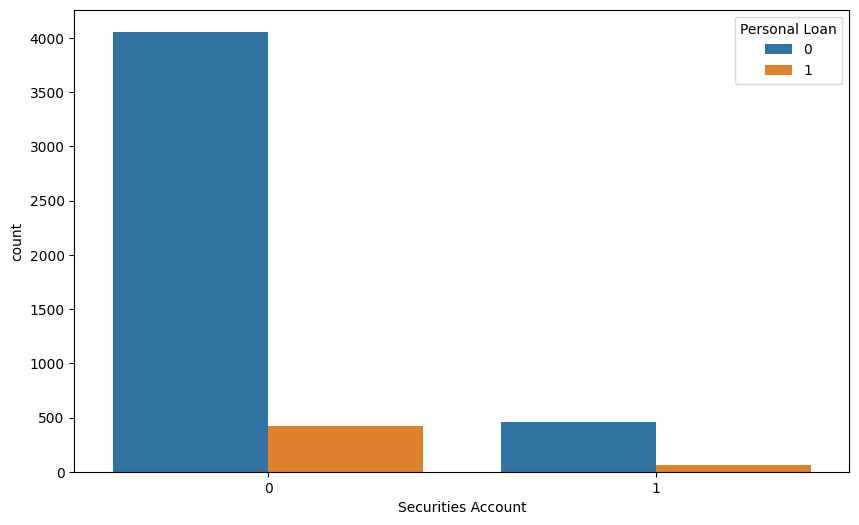

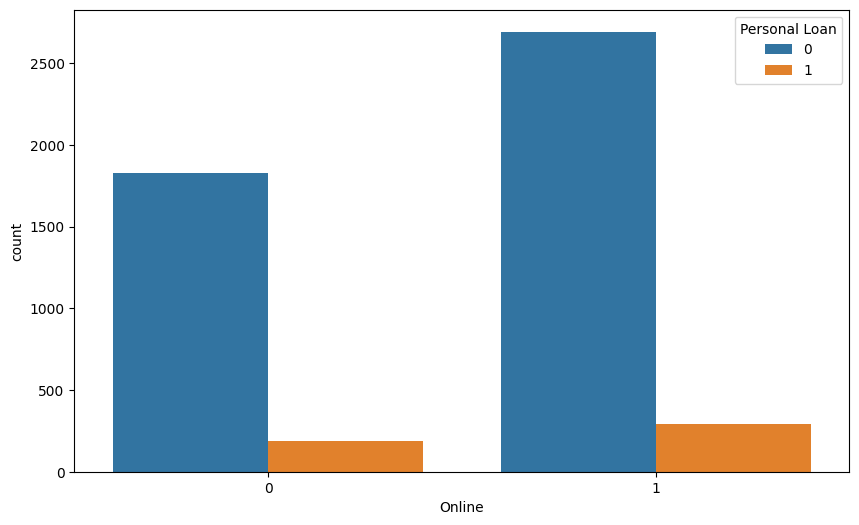

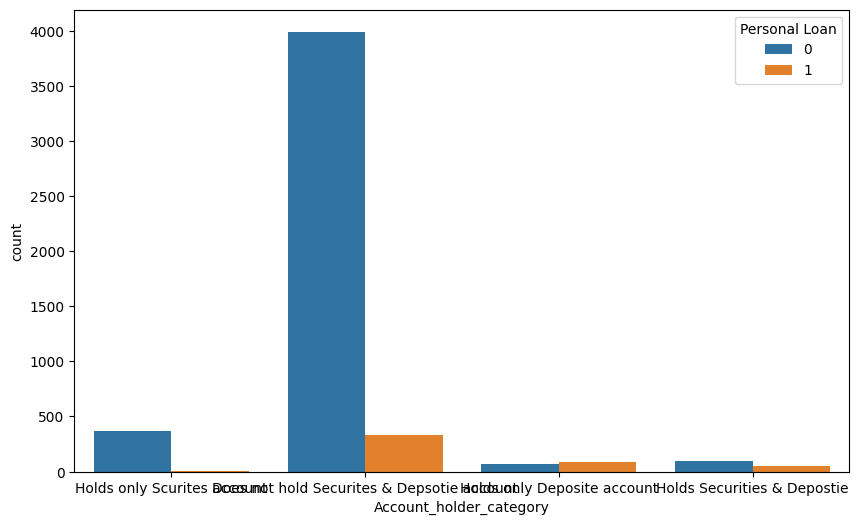

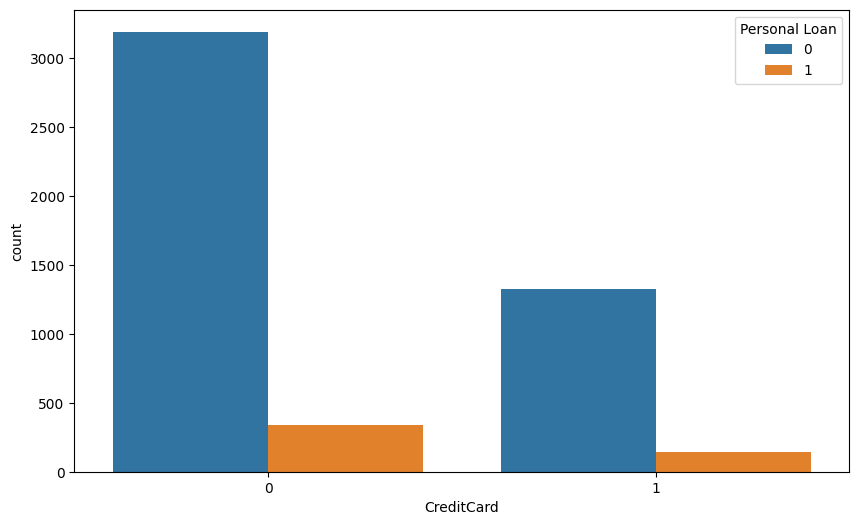

In [63]:
for i in col:
    plt.figure(figsize = (10,6))
    sns.countplot(x = i, data = data, hue = 'Personal Loan')

In [64]:
from scipy.stats import zscore

In [68]:
import pandas as pd

# Check for non-numeric columns
non_numeric_cols = data.select_dtypes(exclude=["number"]).columns

# Print the non-numeric columns
print(f"Non-numeric columns: {non_numeric_cols}")

Non-numeric columns: Index(['EDU', 'Account_holder_category'], dtype='object')


In [71]:

data_1 = data[['Income', 'CCAvg']]
data_1 = np.log(data_1 + 1)
data_1

,Income,CCAvg
0,3.912023,0.955511
1,3.555348,0.916291
2,2.484907,0.693147
3,4.615121,1.308333
4,3.828641,0.693147
...,...,...
4995,3.713572,1.064711
4996,2.772589,0.336472
4997,3.218876,0.262364
4998,3.912023,0.405465


In [72]:
#PowerTranforer
from sklearn.preprocessing import PowerTransformer

<ipython-input-73-756b1dd18760>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




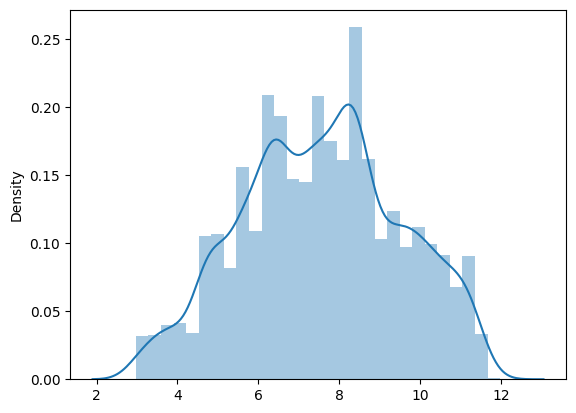

In [73]:
pt = PowerTransformer(method='yeo-johnson', standardize=False)
pt.fit(data['Income'].values.reshape(-1,1))
Income = pt.transform(data['Income'].values.reshape(-1,1))
sns.distplot(Income)
plt.show()